In [1]:
from gensim.models import Word2Vec
import pandas as pd
import numpy as np
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import string
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

C:\Users\user\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Importing data

In [2]:
raw_1 = pd.read_csv( '20191103_131218_sahkprotests_tweets.csv')
raw_2 = pd.read_csv('20191103_153932_sahkprotests_tweets.csv')
raw_3 = pd.read_csv( '20191105_010011_sahkprotests_tweets.csv')
raw_4 = pd.read_csv( '20191105_222815_sahkprotests_tweets.csv')
raw_5 = pd.read_csv( '20191107_000333_sahkprotests_tweets.csv')
raw_6 = pd.read_csv( '20191108_001436_sahkprotests_tweets.csv')
raw_7 = pd.read_csv( '20191109_030106_sahkprotests_tweets.csv')
raw_8 = pd.read_csv( '20191109_120954_sahkprotests_tweets.csv')
raw_9 = pd.read_csv( '20191110_021422_sahkprotests_tweets.csv', engine='python')
raw_10 = pd.read_csv( '20191110_134433_sahkprotests_tweets.csv', engine='python')
raw_11 = pd.read_csv('20191111_223912_sahkprotests_tweets.csv', engine='python')
raw_12 = pd.read_csv('20191112_231846_sahkprotests_tweets.csv', engine='python')
raw_13 = pd.read_csv('20191113_225544_sahkprotests_tweets.csv', engine='python')
raw_14 = pd.read_csv('20191115_000508_sahkprotests_tweets.csv', engine='python')
raw_15 = pd.read_csv('20191116_121136_sahkprotests_tweets.csv', engine='python')
raw_16 = pd.read_csv('20191117_001011_sahkprotests_tweets.csv', engine='python')
raw_17 = pd.read_csv( '20191120_015710_sahkprotests_tweets.csv', engine='python')
raw_18 = pd.read_csv( '20191120_235609_sahkprotests_tweets.csv', engine='python')

In [3]:
raw = pd.concat([raw_1, raw_2, raw_3, raw_4, raw_5, raw_6, raw_7,
                 raw_8, raw_9, raw_10, raw_11, raw_12, raw_13, raw_14,
                 raw_15, raw_16, raw_17, raw_18], axis = 0)

In [4]:
raw.dropna(subset = ['text'], inplace = True)
raw.dropna(subset = ['hashtags'], inplace = True)

Sorting out the data with the follower number and user name

In [6]:
raw['username'].value_counts()

xzxzanalazy        678
belleng324         540
wdamidoinhere      423
natalie_hoyin      286
hky2147            268
PYK62528519        252
Belia78759234      238
scarlet73157932    234
tc20194            213
tinewk             212
atlashongkong1     205
Hk2019Free         191
Freedom29003758    185
MeiChin76490800    183
wonw080            180
JoJo53859628       177
noobmaster1025     177
33Bugsier          175
proud_of_HKers     173
Ep_0016            172
yyy_kin            172
RetweetHongKong    171
Ccw14348622        169
kk3hi3123          167
Phy32833861        166
ericatse           165
bryan_tam_1013     164
Hugomannnn         161
jimmyHK10          159
Sam77959773        159
                  ... 
lok11151             1
maggie04751041       1
AlflawAlf            1
hairlossclinic1      1
agnesxx3             1
thegreenpagesBC      1
DessyFenix           1
NgaiBrenda           1
touchandlove         1
DanielOCL            1
Ye8ApQvs8M8Y84t      1
sparkyofAlberta      1
crimness   

In [7]:
name_list = raw['username'].value_counts()

In [8]:
name_list.to_csv('name.csv')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [21]:
from datetime import datetime
date = []
for i in range(0, len(raw)):
    ith_date_str = raw.iloc[i, :]['tweetcreatedts']
    ith_match = re.search(r'\d{4}-\d{2}-\d{2}', ith_date_str)
    ith_date = datetime.strptime(ith_match.group(), '%Y-%m-%d').date()
    
    date.append(ith_date)
    
print('Len of date list: ', len(date))

Len of date list:  269997


In [22]:
raw['dt_date'] = date
unique_date = np.unique(date)

In [23]:
top_user_df = pd.DataFrame(columns = ['username', 'noTweets', 'noFollowers', 'dt_date'])

pd.to_numeric(raw['totaltweets'])

for ith_date in unique_date:
    print('Current loop: ', ith_date)
    
    temp = raw[raw['dt_date'] == ith_date]
    
    temp_noTweets = temp.groupby(['username']).size().reset_index(name = 'noTweets').sort_values(by = 'username', ascending = False)
    
    temp_noFollowing = temp.groupby(['username'])['followers'].max().reset_index(name = 'noFollowers').sort_values(by = 'username', ascending = False)['noFollowers']
    
    final = pd.concat([temp_noTweets, temp_noFollowing], axis = 1) # add as columns
    final['dt_date'] = ith_date
    
    print(final)
    
    top_user_df = pd.concat([top_user_df, final])

Current loop:  2019-11-03
             username  noTweets  noFollowers     dt_date
9395       zzzqqq9999        10        171.0  2019-11-03
9394          zyxpcy3         2          0.0  2019-11-03
9393          zyx_yny         1       1741.0  2019-11-03
9392          zxlinux         1       3575.0  2019-11-03
9391    zxcvbnvbnvbnm        15          2.0  2019-11-03
9390          zxcv_73         1        434.0  2019-11-03
9389          zwzw_22         2        168.0  2019-11-03
9388      zukashooter         7        867.0  2019-11-03
9387       zu00743015         1        159.0  2019-11-03
9386         zsazsa99         1        738.0  2019-11-03
9385       zryanverse         1        253.0  2019-11-03
9384  zpx8jTcDDsQ2yhq         8          0.0  2019-11-03
9383        zozozoie3         1       1001.0  2019-11-03
9382       zombie1113         1        719.0  2019-11-03
9381         zomb_vam         3          2.0  2019-11-03
9380     zohrathought         1         21.0  2019-11-03
9379 

[4109 rows x 4 columns]
Current loop:  2019-11-06
             username  noTweets  noFollowers     dt_date
4565       zzzqqq9999         1        170.0  2019-11-06
4564      zyyyyyyyy11         1          1.0  2019-11-06
4563          zxj0858         1          6.0  2019-11-06
4562      zukashooter         1        946.0  2019-11-06
4561         zombot19         4         37.0  2019-11-06
4560  zognfTI81HtXiis         1         90.0  2019-11-06
4559         zoewing2         2          5.0  2019-11-06
4558         zilbella         6        443.0  2019-11-06
4557     ziczacmaster         1        216.0  2019-11-06
4556  zhongguowenhua1         2        558.0  2019-11-06
4555     zhao52634346         1         19.0  2019-11-06
4554    zhanjiang2012         1       1602.0  2019-11-06
4553     zhanfuxiaoge         1        141.0  2019-11-06
4552  zh0sqY5wBKzDFvd         1        117.0  2019-11-06
4551      zeroman1985         1        190.0  2019-11-06
4550         zerazumi         1       

             username  noTweets  noFollowers     dt_date
8276             zzap         1       5875.0  2019-11-09
8275          zyx_yny         3       1762.0  2019-11-09
8274           zxlg01         1        566.0  2019-11-09
8273        zxcvbn963         1          1.0  2019-11-09
8272          zwzw_22         1        173.0  2019-11-09
8271       zuosa11365         3        225.0  2019-11-09
8270      zukashooter        14       1050.0  2019-11-09
8269        zozozoie3        12       1064.0  2019-11-09
8268         zombot19         5         38.0  2019-11-09
8267    zoluuuuuuuuuu         2        590.0  2019-11-09
8266  zognfTI81HtXiis        10         91.0  2019-11-09
8265  zm3tpUPEIZc2A6R         2          1.0  2019-11-09
8264          zliyun9         1         36.0  2019-11-09
8263         zlfc1892         1        184.0  2019-11-09
8262       ziyou_2020         1         77.0  2019-11-09
8261       zinizcheng         6         84.0  2019-11-09
8260       zilchleung        11

             username  noTweets  noFollowers     dt_date
6589       zzzqqq9999         1        169.0  2019-11-13
6588     zzcvbnm22331         1          2.0  2019-11-13
6587        zxxjackie         2          2.0  2019-11-13
6586           zxswrd         1         48.0  2019-11-13
6585           zxlg01         1        566.0  2019-11-13
6584          zwzw_22         2        177.0  2019-11-13
6583          zracel1         1          0.0  2019-11-13
6582     zona72924440         2          0.0  2019-11-13
6581         zoevilam         1          1.0  2019-11-13
6580    zoetsangtsang         4         10.0  2019-11-13
6579      zoehung1117         6          8.0  2019-11-13
6578         ziryguti         1         37.0  2019-11-13
6577          zirosou         1       1799.0  2019-11-13
6576       zinfromtko         1         60.0  2019-11-13
6575   zimbardolennon         3        935.0  2019-11-13
6574         zilbella         3        460.0  2019-11-13
6573           zhuhuh         1

             username  noTweets  noFollowers     dt_date
5878        zxdcvasdf         1        429.0  2019-11-16
5877     zwww69697391         5        428.0  2019-11-16
5876       zuosa11365         1        229.0  2019-11-16
5875      zukashooter         1       1821.0  2019-11-16
5874       zrroyip000         5          0.0  2019-11-16
5873       zozo050310         2         12.0  2019-11-16
5872    zoluuuuuuuuuu         1       1176.0  2019-11-16
5871        zoeyomogi         1        140.0  2019-11-16
5870   zoelam06446939         7          1.0  2019-11-16
5869          zoe_yyk         1          1.0  2019-11-16
5868       zinfromtko         1         65.0  2019-11-16
5867         zilbella         6        475.0  2019-11-16
5866     zhongyilao_1         1        784.0  2019-11-16
5865  zhongguowenhua1         1        571.0  2019-11-16
5864      zeroman1985         1        199.0  2019-11-16
5863         zerazumi         4        558.0  2019-11-16
5862       zenmehuine         1

In [24]:
top_user_df = top_user_df.sort_values(by = 'noFollowers', ascending = False)
user_most_followers = top_user_df.groupby('username')['noFollowers', 'dt_date'].max().sort_values(by = 'noFollowers', ascending = False)
user_most_followers['username'] = user_most_followers.index
user_most_followers.reset_index(inplace = True, drop = True)
user_most_followers

,noFollowers,dt_date,username
0,26193629.0,2019-11-19,BBCWorld
1,14177611.0,2019-11-20,CGTNOfficial
2,12642783.0,2019-11-09,XHNews
3,7065479.0,2019-11-15,PDChina
4,4274353.0,2019-11-20,ChinaDaily
5,3988886.0,2019-11-06,marcorubio
6,3350616.0,2019-11-07,EconomicTimes
7,2983379.0,2019-11-03,RT_com
8,2578743.0,2019-11-19,SPIEGELONLINE
9,2169399.0,2019-11-03,airnewsalerts


In [25]:
user_most_followers.to_csv('user_most_followers.csv')

Data Cleaning

In [5]:
raw.drop_duplicates(keep = False, inplace = True)

In [6]:
emoji = re.compile("["
         u"\U0001F600-\U0001F64F"  
         u"\U0001F300-\U0001F5FF"  
         u"\U0001F680-\U0001F6FF"  
         u"\U0001F1E0-\U0001F1FF"  
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

In [7]:
stopwords = nltk.corpus.stopwords.words('english')
sw_list = [ "the", "of", "e.g.", "have", "an","also", "like","text","indices"]
stopwords.extend(sw_list)

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = emoji.sub(r'', text)
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    text = [word for word in text if not any(c.isdigit() for c in word)]
    text = [word for word in text if word not in stopwords]
    text = [t for t in text if len(t) > 0]
    text = " ".join(text)

    return text

round1 = lambda x: clean_text(x)

def strip_chinese_words(string):
    
    en_list = re.findall(u'[^\u4E00-\u9FA5\u3000-\u303F]', str(string))
        
    for c in string:
        if c not in en_list:
            string = string.replace(c, '')
    return string

round2= lambda x: strip_chinese_words(x)

In [8]:
raw['text'] = raw['text'].apply(round2)
raw['text'] = raw['text'].apply(round1)


In [9]:
raw_list_text = raw['text']

In [ ]:
raw_list_text.to_csv('clean_raw_text.csv')

In [88]:
raw.to_csv('clean_raw.csv')

In [10]:
raw['hashtags'] = raw['hashtags'].apply(round1)
raw['hashtags'] = raw['hashtags'].apply(round2)

In [11]:
raw_list_hashtags = raw['hashtags']

In [91]:
raw_list_hashtags.to_csv('clean_raw_hashtags.csv')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


Word Embedding

In [12]:
newsText = raw["text"].values

In [13]:
newsVec = [nltk.word_tokenize(text) for text in newsText]

In [14]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
model = Word2Vec(newsVec, min_count = 1, workers = 4, sg = 1)

In [15]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [24]:
model_plot = Word2Vec(newsVec, size=100, window=20, min_count=4000, workers=4)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


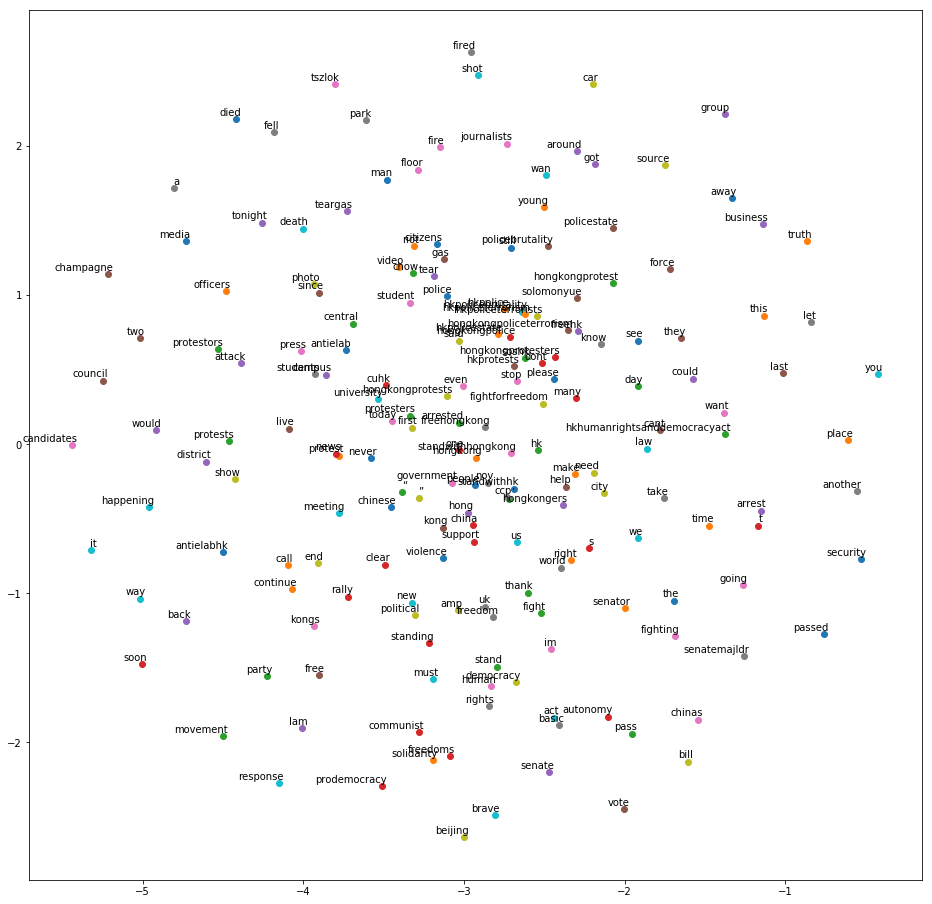

In [25]:
tsne_plot(model_plot)

In [26]:
model.most_similar('hkpoliceterrorism')[:20]

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('hkpolicebrutality', 0.7589132785797119),
 ('hkpolicestate', 0.7112683653831482),
 ('helpus', 0.6904658675193787),
 ('httpstcorfnklbixyl', 0.6885478496551514),
 ('hkpolicebrutalitiy', 0.6783536076545715),
 ('httpstcoklsbfdaaki', 0.6738325357437134),
 ('httpstcobvolxkmidg', 0.6712405681610107),
 ('httpstcoacrogtbufp', 0.6702948212623596),
 ('hkpolicemurder', 0.668451189994812),
 ('protecthongkong', 0.6683769822120667)]

In [27]:
model.most_similar('standwithhongkong')[:20]

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('standwithhk', 0.56546950340271),
 ('ushongkongprostests', 0.5632084608078003),
 ('httpstcoawruynvbxa', 0.5519669651985168),
 ('fivedemandsnotoneless', 0.5478800535202026),
 ('fightforfreedom', 0.5474215745925903),
 ('postcards', 0.546220064163208),
 ('httpstconmgtwtbnbi', 0.5449793338775635),
 ('httpstcovwbmfjruxr', 0.5376010537147522),
 ('fightforfreedomstandwithhongkong', 0.537034809589386),
 ('standwithhong', 0.5357679128646851)]

Sentiment Test

In [164]:
sid = SentimentIntensityAnalyzer()
score = lambda x: sid.polarity_scores(x)
raw['sentiment'] = raw['text'].apply(score)
raw = pd.concat([raw.drop(['sentiment'], axis = 1), raw['sentiment'].apply(pd.Series)], axis = 1)

In [167]:
raw.reset_index(inplace = True, drop = True)
raw.head()
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263648 entries, 0 to 263647
Data columns (total 15 columns):
username          263648 non-null object
acctdesc          191768 non-null object
location          96857 non-null object
following         263648 non-null float64
followers         263648 non-null float64
totaltweets       263648 non-null object
usercreatedts     263648 non-null object
tweetcreatedts    263648 non-null object
retweetcount      263648 non-null object
text              263648 non-null object
hashtags          263648 non-null object
neg               263648 non-null float64
neu               263648 non-null float64
pos               263648 non-null float64
compound          263648 non-null float64
dtypes: float64(6), object(9)
memory usage: 30.2+ MB


Plotting graph

In [129]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

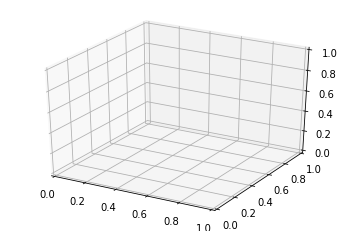

In [118]:
fig = plt.figure()
ax = plt.axes(projection='3d')

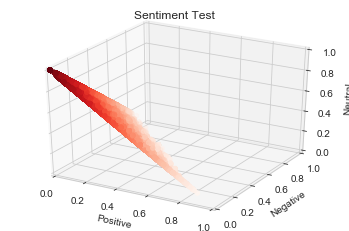

In [150]:
ax = plt.axes(projection='3d')



# Data for three-dimensional scattered points
zdata = raw['neu']
xdata = raw['pos']
ydata = raw['neg']
ax.set_xlim(0, 1); ax.set_ylim(0, 1); ax.set_zlim(0, 1);
ax.set_xlabel('Positive')
ax.set_ylabel('Negative')
ax.set_zlabel('Neutral');
ax.set_title('Sentiment Test')
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds');

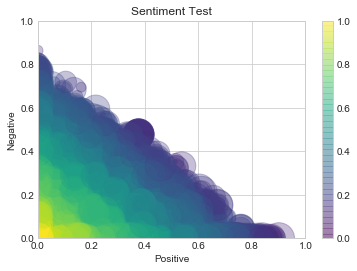

In [151]:
rng = np.random.RandomState(0)
x =  raw['pos']
y =  raw['neg']
colors =  raw['neu']
sizes = 1000 * rng.rand(100)

plt.xlim(0,1);
plt.ylim(0,1);

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.title(label = 'Sentiment Test', loc = 'center')
plt.xlabel('Positive')
plt.ylabel('Negative')
plt.colorbar();  # show color scale
plt.clim(0,1);

In [177]:
raw.tail(5)

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,neg,neu,pos,compound,sentiment_class
263643,Wasurenai_x,Music above everything.,NaN,127.0,14.0,939,2010-04-27 08:56:13,2019-11-20 15:21:30,915,us senate passed hong kong human rights democr...,,0.090,0.793,0.117,0.2023,2
263644,cammmmyw,NaN,NaN,24.0,1.0,52,2019-10-01 03:28:05,2019-11-20 15:21:30,1776,new violence hong kong escalated uk moral lega...,,0.136,0.662,0.202,-0.0000,2
263645,kumaluvhk,Stand with HK,Hong Kong,187.0,616.0,659,2017-07-18 12:40:44,2019-11-20 15:21:29,4371,us senate took stand today told chinese commun...,,0.116,0.667,0.218,0.3182,2
263646,projectarale,I guess it is HK who loves me at the first pla...,Hong Kong,779.0,638.0,2012,2019-07-06 06:20:49,2019-11-20 15:21:29,262,hated hk citizens social media worldwide hkpol...,,0.306,0.694,0.000,-0.7650,1
263647,bewaterla,NaN,NaN,55.0,7.0,235,2016-02-15 07:24:45,2019-11-20 15:21:28,2280,told human rights place\n\nthe story china sub...,,0.242,0.758,0.000,-0.7717,1


Table

In [199]:
sentimentclass_list = []

for i in range(0, len(raw)):
    
    curr_compound = raw.iloc[i,:]['compound']
    
    if (curr_compound <= 1.0 and curr_compound >= 0.5):
        sentimentclass_list.append(4)
    elif (curr_compound < 0.5 and curr_compound >= 0):
        sentimentclass_list.append(3)
    elif (curr_compound < 0 and curr_compound >= -0.5):
        sentimentclass_list.append(2)
    elif (curr_compound < -0.5 and curr_compound >= -1.00):
        sentimentclass_list.append(1)

raw['sentiment_class'] = sentimentclass_list

raw.tail()['sentiment_class']

263643    3
263644    3
263645    3
263646    1
263647    1
Name: sentiment_class, dtype: int64

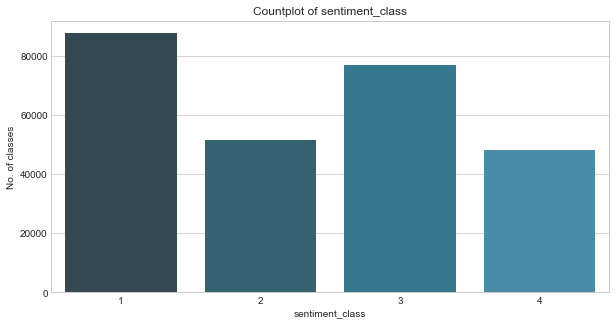

In [200]:
import seaborn as sns

# Distribution of sentiment_class
plt.figure(figsize = (10,5))
sns.set_palette('PuBuGn_d')
sns.countplot(raw['sentiment_class'])
plt.title('Countplot of sentiment_class')
plt.xlabel('sentiment_class')
plt.ylabel('No. of classes')
plt.show()

In [189]:
raw.drop(ind_to_drop, inplace = True)

In [191]:
raw.shape

(263648, 16)

In [192]:
for i in range(0, len(raw)):
    ith_date_str = raw.iloc[i, :]['tweetcreatedts']
    ith_match = re.search(r'\d{4}-\d{2}-\d{2}', ith_date_str)
    ith_date = datetime.strptime(ith_match.group(), '%Y-%m-%d').date()
    
    date.append(ith_date)
    
# Size of list 'date'
print('Len of date list: ', len(date))

Len of date list:  263648


In [193]:
raw['dt_date'] = date
raw['dt_date'].value_counts()

2019-11-03    29892
2019-11-09    29133
2019-11-12    15000
2019-11-20    15000
2019-11-16    15000
2019-11-11    15000
2019-11-13    15000
2019-11-14    15000
2019-11-15    15000
2019-11-19    15000
2019-11-04    14644
2019-11-08    14422
2019-11-06    14398
2019-11-07    14184
2019-11-05    13624
2019-11-10    13351
Name: dt_date, dtype: int64

In [201]:
raw.tail(5)

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,neg,neu,pos,compound,sentiment_class,dt_date
263643,Wasurenai_x,Music above everything.,NaN,127.0,14.0,939,2010-04-27 08:56:13,2019-11-20 15:21:30,915,us senate passed hong kong human rights democr...,,0.090,0.793,0.117,0.2023,3,2019-11-20
263644,cammmmyw,NaN,NaN,24.0,1.0,52,2019-10-01 03:28:05,2019-11-20 15:21:30,1776,new violence hong kong escalated uk moral lega...,,0.136,0.662,0.202,-0.0000,3,2019-11-20
263645,kumaluvhk,Stand with HK,Hong Kong,187.0,616.0,659,2017-07-18 12:40:44,2019-11-20 15:21:29,4371,us senate took stand today told chinese commun...,,0.116,0.667,0.218,0.3182,3,2019-11-20
263646,projectarale,I guess it is HK who loves me at the first pla...,Hong Kong,779.0,638.0,2012,2019-07-06 06:20:49,2019-11-20 15:21:29,262,hated hk citizens social media worldwide hkpol...,,0.306,0.694,0.000,-0.7650,1,2019-11-20
263647,bewaterla,NaN,NaN,55.0,7.0,235,2016-02-15 07:24:45,2019-11-20 15:21:28,2280,told human rights place\n\nthe story china sub...,,0.242,0.758,0.000,-0.7717,1,2019-11-20


In [202]:
date_sen_cat = raw[['dt_date', 'sentiment_class']]
date_sen_cat.to_csv("date_sen_cat.csv")